All Rows and Columns of the AirPassengers Dataset:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119
1949-11-01         104
1949-12-01         118
1950-01-01         115
1950-02-01         126
1950-03-01         141
1950-04-01         135
1950-05-01         125
1950-06-01         149
1950-07-01         170
1950-08-01         170
1950-09-01         158
1950-10-01         133
1950-11-01         114
1950-12-01         140
1951-01-01         145
1951-02-01         150
1951-03-01         178
1951-04-01         163
1951-05-01         172
1951-06-01         178
1951-07-01         199
1951-08-01         199
1951-09-01         184
1951-10-01         162
1951-11-01         146
1951-12-01         166
1952-01-01         171
1952-02-01         180
1952-03-01         193
1952-0

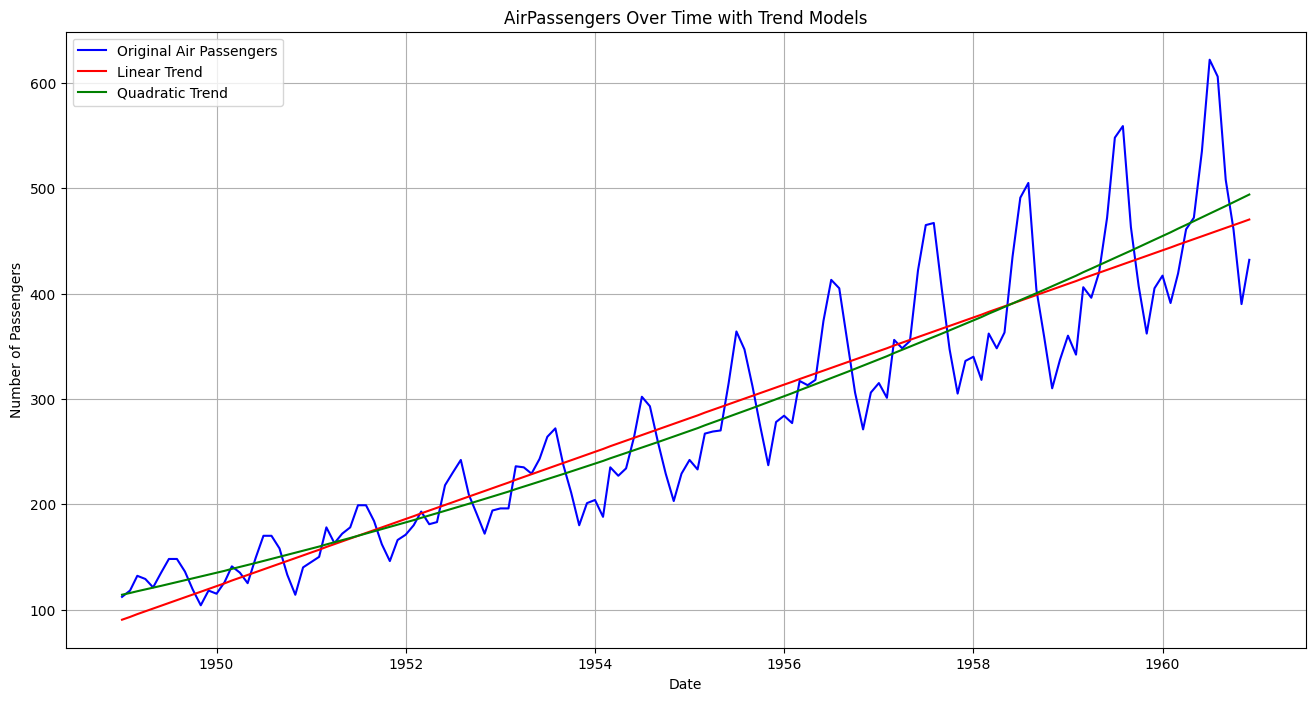


Dataset with Trend Model Predictions:
            Passengers  Linear_Trend  Quadratic_Trend
Month                                                
1949-01-01         112     90.309962       114.028041
1949-02-01         118     92.967146       115.690061
1949-03-01         132     95.624330       117.366097
1949-04-01         129     98.281513       119.056149
1949-05-01         121    100.938697       120.760218
1949-06-01         135    103.595881       122.478304
1949-07-01         148    106.253065       124.210405
1949-08-01         148    108.910249       125.956523
1949-09-01         136    111.567433       127.716658
1949-10-01         119    114.224617       129.490809
1949-11-01         104    116.881801       131.278976
1949-12-01         118    119.538985       133.081160
1950-01-01         115    122.196169       134.897360
1950-02-01         126    124.853352       136.727577
1950-03-01         141    127.510536       138.571809
1950-04-01         135    130.167720       

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.api as sm

# Load the AirPassengers dataset
file_path = 'C:/Users/USER/Downloads/AirPassengers.csv'
try:
    df = pd.read_csv(file_path, parse_dates=['Month'], index_col='Month')
    df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure the AirPassengers dataset is in your Downloads folder.")
    exit()

# Enable showing all rows and columns (optional, but good for inspection)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("All Rows and Columns of the AirPassengers Dataset:")
print(df)

# 1. Linear Trend Model
X_linear = sm.add_constant(np.arange(len(df))) # Add a constant for the intercept
model_linear = sm.OLS(df['Passengers'], X_linear).fit()
df['Linear_Trend'] = model_linear.fittedvalues
print("\nLinear Trend Model Summary:")
print(model_linear.summary())

# 2. Nonlinear Trend Model (Quadratic)
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

x_nonlinear = np.arange(len(df))
popt_quadratic, pcov_quadratic = curve_fit(quadratic_func, x_nonlinear, df['Passengers'])
df['Quadratic_Trend'] = quadratic_func(x_nonlinear, *popt_quadratic)
print("\nQuadratic Trend Model Parameters:")
print(f"a = {popt_quadratic[0]:.6e}, b = {popt_quadratic[1]:.6e}, c = {popt_quadratic[2]:.6f}")

# Visualization
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Passengers'], label='Original Air Passengers', color='blue')
plt.plot(df.index, df['Linear_Trend'], label='Linear Trend', color='red')
plt.plot(df.index, df['Quadratic_Trend'], label='Quadratic Trend', color='green')
plt.title('AirPassengers Over Time with Trend Models')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

print("\nDataset with Trend Model Predictions:")
print(df)

print("\nRemember to complete the Excel part of the assignment and write your reflection comparing Excel, R, and Python for trend analysis.")